### Neuron (Perceptron)

A neuron is the basic unit of a neural network. A neuron identified by index $j$ has the following structure:
\begin{align*}
 z &= w_j^T x + b_j \\
 h &= \sigma(z).
\end{align*}
Above,
  - $x$ is the input vector,
  - $w_j$ is the weight vector, which correspond to the synapses of the neuron that admit input signals from the previous layer,
  - $\sigma$ is the activation function that determines whether the neuron is activated or not,
  - $b_j$ is the bias, which is a constant,
  - $z$ is the linear activation of the neuron,
  - $h$ is the activation output of the neuron.

The first-generation activation function was the Heaviside step function:

$$\sigma(z) = \begin{cases} 1 & \text{if } z \geq 0, \\ 0 & \text{otherwise.} \end{cases}$$

This construction, called a **perceptron**, is not popular nowadays since it is not differentiable. Modern neural networks use differentiable activation functions such as:

- Sigmoid function: $\sigma(z) = \frac{1}{1+e^{-z}}$,
- Hyperbolic tangent function: $\sigma(z) = \tanh(z)$,
- Rectified linear unit (ReLU): $\sigma(z) = \max(0, z)$.

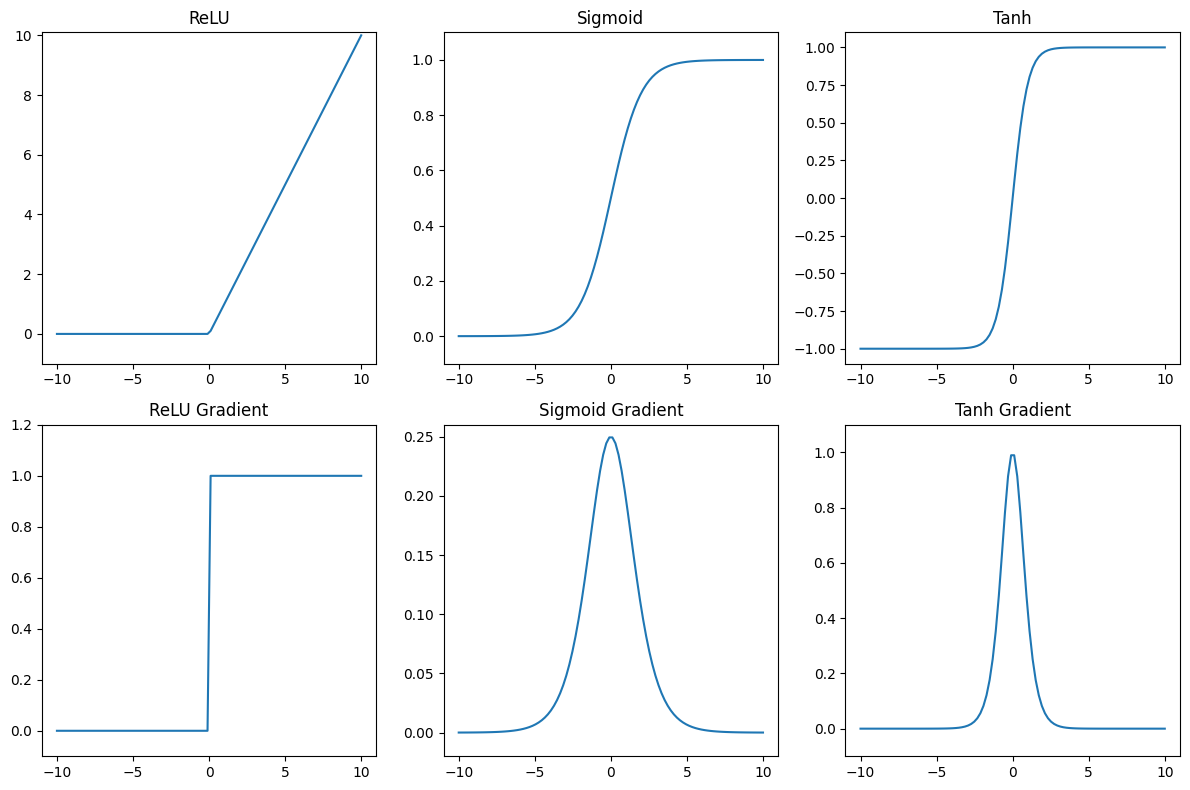

In [45]:
import torch as th
import matplotlib.pyplot as plt

# The ReLU, Sigmoid, and Tanh activation functions can be plotted in different panels of a figure as below:

x = th.linspace(-10, 10, 100)
x.requires_grad = True  # Enable gradient tracking for x

# Create a figure with two rows and three columns of subplots
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Plot the original functions in the top row
# ReLU
y_relu = th.relu(x)
axes[0, 0].plot(x.detach().numpy(), y_relu.detach().numpy())
axes[0, 0].set_title('ReLU')
axes[0, 0].set_ylim(-1, 10.1)

# Sigmoid
y_sigmoid = th.sigmoid(x)
axes[0, 1].plot(x.detach().numpy(), y_sigmoid.detach().numpy())
axes[0, 1].set_title('Sigmoid')
axes[0, 1].set_ylim(-0.1, 1.1)

# Tanh
y_tanh = th.tanh(x)
axes[0, 2].plot(x.detach().numpy(), y_tanh.detach().numpy())
axes[0, 2].set_title('Tanh')
axes[0, 2].set_ylim(-1.1, 1.1)

# Compute gradients
# Compute gradients using the automatic differentiation provided by PyTorch
grad_relu = th.autograd.grad(y_relu.sum(), x)[0].detach().numpy()
grad_sigmoid = th.autograd.grad(y_sigmoid.sum(), x)[0].detach().numpy()
grad_tanh = th.autograd.grad(y_tanh.sum(), x)[0].detach().numpy()

# Plot the gradients in the bottom row
axes[1, 0].plot(x.detach().numpy(), grad_relu)
axes[1, 0].set_title('ReLU Gradient')
axes[1, 0].set_ylim(-0.1, 1.2)

axes[1, 1].plot(x.detach().numpy(), grad_sigmoid)
axes[1, 1].set_title('Sigmoid Gradient')
axes[1, 1].set_ylim(-0.02, 0.26)  # Adjusted y-axis limits for sigmoid gradient

axes[1, 2].plot(x.detach().numpy(), grad_tanh)
axes[1, 2].set_title('Tanh Gradient')
axes[1, 2].set_ylim(-0.1, 1.1)

plt.tight_layout()

plt.show()


### Neural Network (Multilayer Perceptron)

A neural network is a collection of neurons. The neurons are organized in layers such that the activation output of the neurons in one layer become the synaptic inputs of the next layer. The operation of $k$ neurons sharing the same layer $l$ on the $i$ th can be given in the vector form below:

\begin{align*}
 z_i^l &= W_l^T h_i^{l-1} + b^l, \\
 h_i^l &= \sigma(z_i^l),
\end{align*}

where 

$W_l= \begin{bmatrix} w_1^l & w_2^l & \cdots & w_k^l \end{bmatrix}$,

is the matrix of weight vectors and 

$b_l=(b_1^l, \ldots, b_k^l)$ 

is the vector of biases. The vector $h_i^l$ is called the **activation map** of the layer $l$ for the $i$ th input. For $l=0$, the activation map is the input vector $x$. The activation map of the last layer is the output $y_i$ of the neural network.

Assume we have a neural network with two layers. We can express its whole operation as:

$$y_i = W_2^T \sigma(W_1^T x_i + b_1) + b_2.$$

Likewise, we can express the operation of a neural network with three layers as:

$$y_i = W_3^T \sigma(W_2^T \sigma(W_1^T x_i + b_1) + b_2) + b_3.$$



### Training a Neural Network: Backpropagation

As other machine learning models we covered thus far, neural networks are also trained to minimize a loss function. Denote the loss function by $L(y, \widehat{y})$ for a prediction $\widehat{y}$ and the true value $y$. Due to the cascaded application of the nonlinear activation functions, the loss function is not convex. Therefore, we cannot find the optimal solution analytically. Instead, we use gradient descent:

\begin{align*}
  w_{ij}^l := w_{ij}^l - \alpha \frac{\partial L}{\partial w_{ij}^l},
\end{align*}

for all synaptic connections $i \rightarrow j$ in all layers $l$. Given a neural network with $H$ layers, define $\widehat{y}_j = z_j^H$ as the output of the $j$ th neuron in the last layer. Also define

\begin{align*}
  \delta_j^l = \frac{\partial L}{\partial z_j^l}.
\end{align*}

This expression is called the **error** of the $j$ th neuron in the $l$ th layer. To see why, consider the case where $l=H$ and the loss function is the mean squared error: $\ell(y, \hat{y}) = \frac{1}{2} \sum_{j} (y_j - \hat{y}_j)^2$. Then we have

\begin{align*}
  \delta_j^H &= \frac{\partial \frac{1}{2} \sum_{j} (y_j - \hat{y}_j)^2}{\partial z_j^H} \\
  &= \frac{\partial \frac{1}{2} (y_j - \hat{y}_j)^2}{\partial \hat{y}_j}\\
  &= \hat{y}_j - y_j.
\end{align*}

This is the error of the prediction of the neural network on the $j$ output channel. The gradient of the loss with respect to an arbitrary weight is

\begin{align*}
  \frac{\partial L}{\partial w_{ij}^l} &= \frac{\partial L}{\partial z_j^l} \frac{\partial z_j^l}{\partial w_{ij}^l} \\
  &= \delta_j^l \frac{\partial z_j^l}{\partial w_{ij}^l}\\
  &= \delta_j^l h_i^{l-1}.
\end{align*}

Let us next calculate the error for an intermediate layer $l$. We have

\begin{align*}
  \delta_j^l &= \frac{\partial L}{\partial z_j^l} \\
  &= \sum_{k} \frac{\partial L}{\partial z_k^{l+1}} \frac{\partial z_k^{l+1}}{\partial z_j^l} \\
  &= \sum_{k} \delta_k^{l+1} \frac{\partial z_k^{l+1}}{\partial z_j^l}
\end{align*}

where $k$ ranges over the neurons in the next layer. Place the definition of $z_k^{l+1}$ into the above equation, we have

\begin{align*}
 \frac{\partial z_k^{l+1}}{\partial z_j^l} &= \frac{\partial}{\partial z_j^l} \left( \sum_{j'} w_{j'k}^{l+1} \sigma(z_{j'}^l) + b_{j'}^{l+1} \right) \\
  &= w_{jk}^{l+1} \frac{\partial \sigma(z_j^l)}{\partial z_j^l}.
\end{align*}

Placing this result into the above expression about the derivative of the error, we get

\begin{align*}
  \delta_j^l &=  \frac{\partial \sigma(z_j^l)}{\partial z_j^l} \sum_{k} \delta_k^{l+1} w_{jk}^{l+1} 
\end{align*}

This way we obtain a recursive formula for the error of a neuron in an intermediate layer, where the recursion applies in the backward direction of the layers. There are remarkable facts regarding the computational efficiency of this formula that are first observed by Rumelhart et al. in 1986 and made the training of multilayer neural networks feasible:

 - It requires only $z_j^l$, which is already calculated during the forward pass.
 - Its computational cost is linear to the number of neurons in the network, i.e. $O(|W|)$ where $|W|$ is the number of weights in the network.

 The findings above can be put together into an algorithm and expressed as below.

1. Set $z_0 = x$, $z_H = \sigma(z_H)$.

2. **Forward Pass.** For $l=1 \rightarrow H$ do:
    - Compute and save $z_l = \sum_{j} w_{ij}^l \sigma(z_{l-1}) + b_j^l$

3. **Backward Pass.** For $l=H \rightarrow 1$ do:
    - Compute $\delta_j^l =  \frac{\partial \sigma(z_j^l)}{\partial z_j^l} \sum_{k} \delta_k^{l+1} w_{jk}^{l+1}$
    - Compute $\frac{\partial L}{\partial w_{ij}^l} = \delta_j^l \sigma(z_i^{l-1})$

This algorithm is called **backpropagation**. The name comes after the notion that the error term $\delta_j^l$ is propagated backward from the output layer to the input layer.

## Stochastic Gradient Descent

Above we explained the backpropagation algorithm for a single data point for simplicity. For a data set with $m$ samples, the gradient descent algorithm becomes:

\begin{align*}
 w_{ij}^l := w_{ij}^l - \alpha \frac{1}{m} \sum_{i=1}^m \frac{\partial L(y_i, \widehat{y}_i)}{\partial w_{ij}^l},
\end{align*}

This means we need to do a forward pass and a backward pass for all weights and all data points. This is computationally expensive for large data sets. Instead, we can use a technique called **stochastic gradient descent**. In this technique, we use a subset of the data set, called a **mini-batch**, to calculate the gradient. The size of the mini-batch is denoted by $b$. The stochastic gradient descent algorithm can be expressed as:

\begin{align*}
   B &= \{ (x_i, y_i) \}_{i=1}^b \sim D \\
  w_{ij}^l &:= w_{ij}^l - \alpha \frac{1}{b} \sum_{i=1}^b \frac{\partial L(y_i, \widehat{y}_i)}{\partial w_{ij}^l},
\end{align*}

where the first step randomly samples a mini-batch $B$ from the data set $D$ and the second step performs a gradient descent update using the backpropagation algorithm.  The random selection makes the gradient signal a random variable. This is why the algorithm is called stochastic gradient descent. This random variable is essentially an unbiased estimate of the true gradient. Hence, under mild conditions clarified by Robbins and Monro in 1951, the algorithm converges to the same solution as the plain deterministic gradient descent.

Nearly every neural network used nowadays is trained by minimizing a loss function using stochastic gradient descent with backpropagation. The common practice is to use an automatic differentiation library such as TensorFlow or PyTorch that automates the process of calculating the gradients. These libraries also provide a variety of neural network architectures and optimization algorithms. Below, we give an example implementation of a neural network using PyTorch on a handwritten digit classification problem. The used data set is among the most famous data sets in machine learning, called MNIST. It contains 70,000 images of handwritten digits. Each image is a 28x28 grayscale image. The goal is to classify the images into 10 classes, one for each digit.

In [3]:
# MNIST digits classification with a simple deep neural network

import numpy as np
import matplotlib.pyplot as plt
import torch as th

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from torch import nn
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from torchvision import datasets, transforms

# Load the data from torchvision

# Define the transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Download the data
train_ds = datasets.MNIST('data', train=True, 
            download=True, transform=transform)
test_ds = datasets.MNIST('data', train=False,
            download=True, transform=transform)

# Create the data loaders
batch_size = 64 # Define the batch size
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
test_dl = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

# Define the model
model = nn.Sequential(
    nn.Linear(784, 256),
    nn.ReLU(),
    nn.Linear(256, 512),
    nn.ReLU(),
    nn.Linear(512, 1024),
    nn.ReLU(),
    nn.Linear(1024, 10)
)

# Define the loss function
loss_fn = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = th.optim.SGD(model.parameters(), lr=1e-4)

# Train the model
for epoch in range(100):
    print(epoch)
    # Randomly coose a mini-batch of data samples
    for xb, yb in train_dl:
        # Forward pass
        y_pred = model(xb.view(-1, 784))
        loss = loss_fn(y_pred, yb)
        
        # Backward pass
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
    # Print the loss
    print(f'Epoch {epoch+1}, loss: {loss.item():.4f}')

# Evaluate the model on the test set
def evaluate(model, test_dl):
    model.eval()
    correct = 0
    for xb, yb in test_dl:
        y_pred = model(xb.view(-1, 784))
        _, preds = th.max(y_pred, dim=1)
        correct += accuracy_score(yb, preds)
    return correct / len(test_dl)

print(f'Test accuracy: {evaluate(model, test_dl):.4f}')

0
Epoch 1, loss: 2.2655
1
Epoch 2, loss: 2.2440
2
Epoch 3, loss: 2.2269
3
Epoch 4, loss: 2.2115
4
Epoch 5, loss: 2.1360
5
Epoch 6, loss: 2.1052
6
Epoch 7, loss: 2.0069
7
Epoch 8, loss: 1.9794
8
Epoch 9, loss: 1.8881
9
Epoch 10, loss: 1.8433
10
Epoch 11, loss: 1.7294
11
Epoch 12, loss: 1.6692
12
Epoch 13, loss: 1.6743
13
Epoch 14, loss: 1.4617
14
Epoch 15, loss: 1.3049
15
Epoch 16, loss: 1.5321
16
Epoch 17, loss: 1.4860
17
Epoch 18, loss: 1.1417
18
Epoch 19, loss: 1.3915
19
Epoch 20, loss: 1.1111
20
Epoch 21, loss: 1.0564
21
Epoch 22, loss: 0.9029
22
Epoch 23, loss: 0.9960
23
Epoch 24, loss: 0.8241
24
Epoch 25, loss: 0.7931
25
Epoch 26, loss: 0.8374
26
Epoch 27, loss: 0.9556
27
Epoch 28, loss: 0.7198
28
Epoch 29, loss: 0.7623
29
Epoch 30, loss: 0.9868
30
Epoch 31, loss: 0.6667
31
Epoch 32, loss: 0.8076
32
Epoch 33, loss: 0.7017
33
Epoch 34, loss: 0.4743
34
Epoch 35, loss: 0.9481
35
Epoch 36, loss: 0.4997
36
Epoch 37, loss: 0.5927
37
Epoch 38, loss: 0.4575
38
Epoch 39, loss: 0.5152
39
Ep